In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpitree.decision_tree import DecisionTreeClassifier

In [2]:
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split

# iris = load_iris(as_frame=True)
# X_train, X_test, y_train, y_test = train_test_split(
#     iris.data[["sepal length (cm)", "sepal width (cm)"]],
#     iris.target,
#     test_size=.2,
#     random_state=40,
# )

In [3]:
# clf = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
# print(clf)

# train_score, test_score = clf.score(X_train, y_train), clf.score(X_test, y_test)

# print(f"\nTrain-Test Accuracy: ({train_score:.2%}, {test_score:.2%})")
# print(f"\nPredict Probability:\n{clf.predict_proba(X_test).round(3)}")

In [4]:
X = np.array(
    [
        ["false", "true", "true", "false", "false", "true", "true"],
        ["steep", "moderate", "steep", "steep", "flat", "steep", "steep"],
        ["high", "low", "medium", "medium", "high", "highest", "high"],
    ]
).T

y = np.array(
    [
        "chapparal",
        "riparian",
        "riparian",
        "chapparal",
        "conifer",
        "conifer",
        "chapparal",
    ]
)

X = pd.DataFrame(X, columns=["Stream", "Slope", "Elevation"])
y = pd.Series(y)

X

,Stream,Slope,Elevation
0,false,steep,high
1,true,moderate,low
2,true,steep,medium
3,false,steep,medium
4,false,flat,high
5,true,steep,highest
6,true,steep,high


In [5]:
clf = DecisionTreeClassifier().fit(X, y)
print(clf)

┌── Elevation
│  ├── Stream [medium]
│  │  └── class: riparian [true]
│  │  └── class: chapparal [false]
│  ├── Slope [high]
│  │  └── class: chapparal [steep]
│  │  └── class: chapparal [moderate]
│  │  └── class: conifer [flat]
│  └── class: riparian [low]
│  └── class: conifer [highest]


In [6]:
np.column_stack((clf.predict_proba(X).round(2), clf.predict(X)))

array([[0.66666667, 0.33333333, 0.        ]])

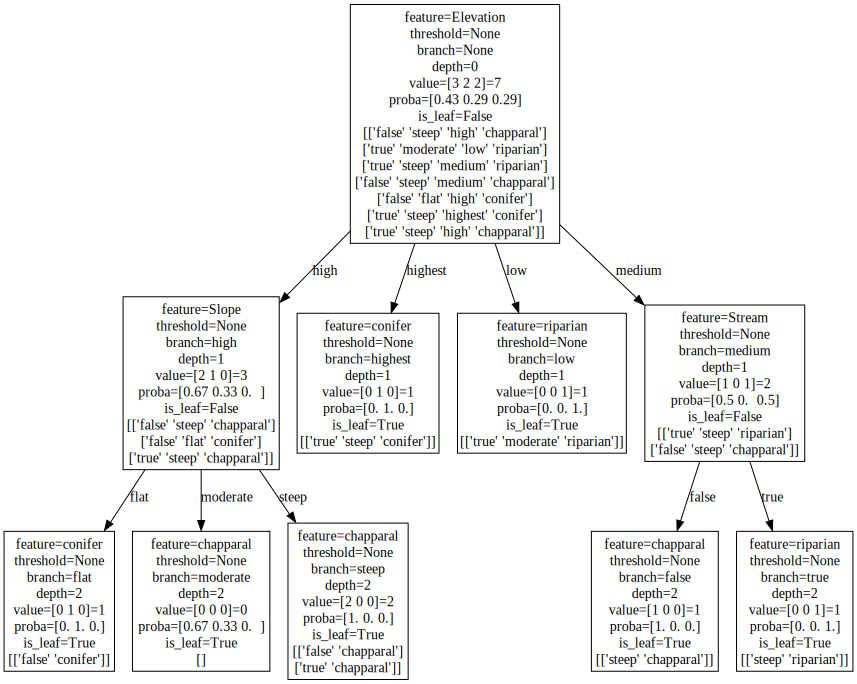

In [7]:
clf.export_graphviz()

In [8]:
X = np.array(
    [
        ["false", "true", "true", "false", "false", "true", "true"],
        ["steep", "moderate", "steep", "steep", "flat", "steep", "steep"],
        [3900.0, 300.0, 1500.0, 1200.0, 4450.0, 5000.0, 3000.0],
    ]
).T

y = np.array(
    [
        "chapparal",
        "riparian",
        "riparian",
        "chapparal",
        "conifer",
        "conifer",
        "chapparal",
    ]
)

X = pd.DataFrame(X, columns=["Stream", "Slope", "Elevation"])
y = pd.Series(y)

X

,Stream,Slope,Elevation
0,false,steep,3900.0
1,true,moderate,300.0
2,true,steep,1500.0
3,false,steep,1200.0
4,false,flat,4450.0
5,true,steep,5000.0
6,true,steep,3000.0


In [9]:
clf = DecisionTreeClassifier().fit(X, y)
print(clf)

┌── Elevation
│  ├── Stream [<= 4450.00]
│  │  ├── Elevation [true]
│  │  │  └── class: chapparal [> 3000.00]
│  │  │  └── class: riparian [<= 3000.00]
│  │  └── class: chapparal [false]
│  └── class: conifer [> 4450.00]


In [10]:
np.column_stack((clf.predict_proba(X).round(2), clf.predict(X)))

array([['0.0', '1.0', '0.0', 'conifer'],
       ['0.0', '1.0', '0.0', 'conifer'],
       ['0.0', '1.0', '0.0', 'conifer'],
       ['0.0', '1.0', '0.0', 'conifer'],
       ['0.0', '1.0', '0.0', 'conifer'],
       ['0.0', '0.0', '1.0', 'riparian'],
       ['0.0', '1.0', '0.0', 'conifer']], dtype='<U32')

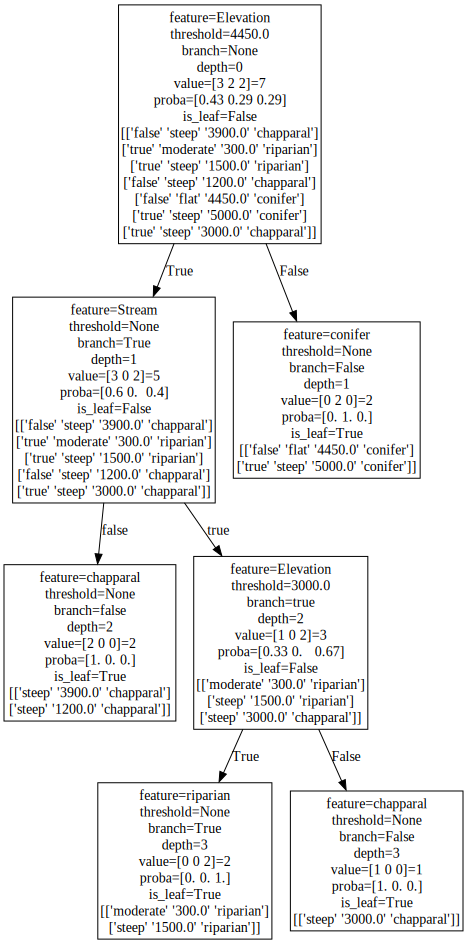

In [11]:
clf.export_graphviz()

In [12]:
# X = X.to_numpy()
# y = y.to_numpy()


# def is_numeric_dtype(arr):
#     try:
#         arr.astype(np.float64)
#         return True
#     except ValueError:
#         return False


# split_feature_idx = 2


# def proba(X):
#     return np.unique(X, return_counts=True)[1] / len(X)


# def _entropy(y):
#     proba = np.proba(y)
#     return -np.sum(proba * np.log2(proba))


# def split_mask(X, mask):
#     return [X[mask], X[~mask]]


# np.split_mask = split_mask


# def cost(x):
#     threshold = x[-1]
#     mask = X[:, split_feature_idx] < threshold
#     levels = np.split_mask(X, mask)
#     weights = [len(l) / len(X) for l in levels]
#     impurity = [_entropy(y[mask]), _entropy(y[~mask])]
#     return np.dot(weights, impurity)


# if is_numeric_dtype(X[:, split_feature_idx]):
#     costs = np.apply_along_axis(cost, axis=1, arr=X)
#     idx = np.argmin(costs)
#     min_cost = min(costs)
#     t_hat = X[idx, -1]

#     print(t_hat)
#     print(min_cost)
#     print(_entropy(y) - min_cost)

In [13]:
# from matplotlib.colors import ListedColormap
# import matplotlib.patches as mpatches

# h = 0.02

# a = "#4993c3"
# b = "#e73031"
# c = "#e3c471"

# aa = "#0000ec"
# bb = "#ff0000"
# cc = "#bfbf00"

# # Create color maps
# cmap_light = ListedColormap([a, b, c])
# cmap_bold = ListedColormap([aa, bb, cc])

# fig = plt.figure()
# gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
# (ax1, ax2), (ax3, ax4) = gs.subplots(sharex="col", sharey="row")

# depths = [1, 3, 5, 10]
# coor = [ax1, ax2, ax3, ax4]

# for depth, ax in zip(depths, coor):
#     clf = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)

#     x_min, x_max = (
#         X_train.values[:, 0].min() - 1,
#         X_train.values[:, 0].max() + 1,
#     )
#     y_min, y_max = (
#         X_train.values[:, 1].min() - 1,
#         X_train.values[:, 1].max() + 1,
#     )

#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     X_t = pd.DataFrame(
#         np.c_[xx.ravel(), yy.ravel()], columns=["sepal length (cm)", "sepal width (cm)"]
#     )

#     Z = clf.predict(X_t)
#     Z = Z.reshape(xx.shape)

#     ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

#     ax.scatter(
#         X_train.values[:, 0],
#         X_train.values[:, 1],
#         c=y_train.values,
#         cmap=cmap_bold,
#         s=15,
#         edgecolors="black",
#         label=f"Depth={depth}",
#     )

#     ax.set_xlim(xx.min(), xx.max())
#     ax.set_ylim(yy.min(), yy.max())

#     if depth == 3:
#         patches = [
#             mpatches.Patch(color=aa, label="iris setosa"),
#             mpatches.Patch(color=bb, label="iris versicolor"),
#             mpatches.Patch(color=cc, label="iris virginica"),
#         ]
#         handles, labels = ax.get_legend_handles_labels()
#         ax.legend(handles=patches, prop={"size": 6})

# fig.supxlabel("sepal length (cm)")
# fig.supylabel("sepal width (cm)")

# plt.show()